In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# Setting the paths 

csvpath0 = Path('C:\\Users\\willu\\Documents\\Resourses2\\week4\\whale_returns.csv.csv')
csvpath1 = Path('C:\\Users\\willu\\Documents\\Resourses2\\week4\\algo_returns.csv.csv')
csvpath2 = Path('C:\\Users\willu\\Documents\\Resourses2\\week4\\sp500_history.csv.csv')

In [3]:
#Reading in the paths
whale_returns_df = pd.read_csv(csvpath0, index_col='Date',parse_dates=True,infer_datetime_format=True)
algo_returns_df = pd.read_csv(csvpath1,  index_col='Date',parse_dates=True,infer_datetime_format=True)
sp500_history_df = pd.read_csv(csvpath2,  index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# counting the nulls in whales_returns_df

whale_returns_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [6]:
#check whale dataframe for null values

whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [7]:
whale_returns_df.shape

(1060, 4)

In [8]:
whale_returns_df.isnull().mean()* 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [9]:
#dropping the null values process
whale_returns_df = whale_returns_df.dropna()

In [10]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [12]:
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [13]:
#cleaning algo returns data of null values process
algo_returns_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [14]:
algo_returns_df = algo_returns_df.dropna()

In [15]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [16]:
sp500_history_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [17]:
# counting the sp500 data
sp500_history_df.count()

Close    1649
dtype: int64

In [18]:
#Getting rid of null values in sp500 data
sp500_history_df.isnull()

sp500_history_df = sp500_history_df.dropna()

In [19]:
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [20]:
sp500_history_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [21]:
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

In [22]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [23]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [24]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [25]:
# check for duplications
whale_returns_df.duplicated()

Date
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-06    False
2015-03-09    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1059, dtype: bool

In [26]:
algo_returns_df.duplicated()

Date
2014-06-05    False
2014-06-06    False
2014-06-09    False
2014-06-10    False
2014-06-11    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1235, dtype: bool

In [27]:
sp500_history_df.duplicated()

Date
2019-04-23    False
2019-04-22    False
2019-04-18    False
2019-04-17    False
2019-04-16    False
              ...  
2012-10-05    False
2012-10-04    False
2012-10-03    False
2012-10-02    False
2012-10-01    False
Length: 1649, dtype: bool

In [28]:
# rename 'close' column to a specific name in relation to portfolio
sp500_history_df = sp500_history_df.rename(columns ={'Date':'Date','Close':'sp500 Returns'})

In [29]:
sp500_history_df

,sp500 Returns
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [30]:
sp500_history_df['sp500 Returns'] = sp500_history_df['sp500 Returns'].pct_change()

In [31]:
sp500_history_df

,sp500 Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [32]:
joined_data_df = pd.concat([whale_returns_df,algo_returns_df,sp500_history_df], axis='columns', join='inner')

In [33]:
joined_data_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [34]:
joined_data_df.head().sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


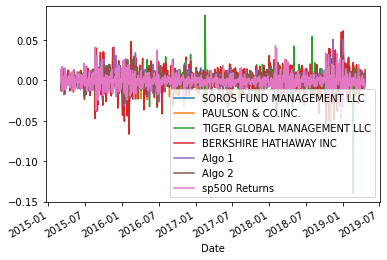

In [35]:
# Plotting daily returns of all values
joined_data_df.plot(kind='line')
joined_data_df.head()

In [36]:
#calculate cumalative daily returns 
cumulative_returns = (1 + joined_data_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


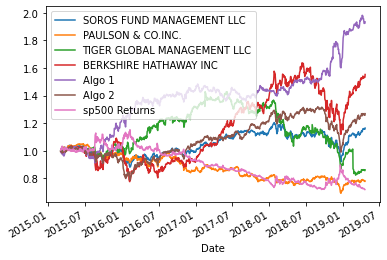

In [37]:
cumulative_returns.plot()

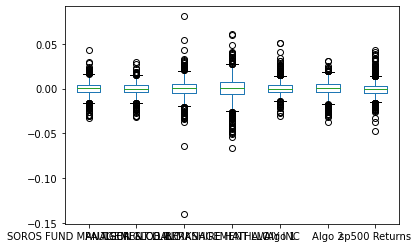

In [38]:
#Creat a box plot for each individual dataframe
joined_data_df.plot(kind='box')

In [39]:
joined_data_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500 Returns                  0.008587
dtype: float64

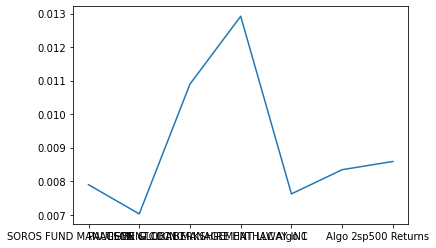

In [40]:
joined_data_df.std().plot(kind='line')

In [41]:
# Based of the standard deviations, starting from the most volatile I would choose Paulson and Co INC, Soros Fund, and then both algo returns.
# The reasoning behind this is beacuse a lower standard deviation means a lower risk in an investment. Each of those corpoations showed a lower standard than the sp500 standard deviation.
# All the rest would would most likely yeild a higher risk, based of having a higher standard deviation.

# every other returns from the other dataframes yeild a higher standard deviation than the sp500 returns,meaning less volatility and more risk.

In [42]:
annualized_standard = joined_data_df.std() * np.sqrt(252)

In [43]:
annualized_standard

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500 Returns                  0.136313
dtype: float64

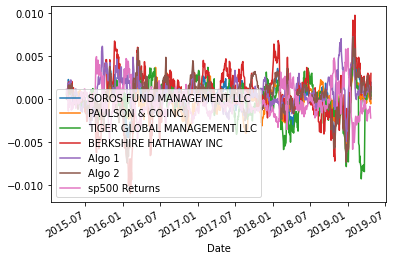

In [44]:
#Plotting the rooling standard deviation for each dataframe and ploting it
joined_data_df.rolling(window=21).mean().plot()

In [45]:
joined_data_df.rolling(window=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.001450,0.000153,0.001473,0.001979,0.000864,0.000614,-0.001107
2019-04-17,0.001305,-0.000252,0.000996,0.001581,0.000475,0.000389,-0.001322
2019-04-18,0.001597,0.000020,0.001376,0.001691,0.000883,0.000283,-0.000859


In [46]:
joined_data_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
sp500 Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


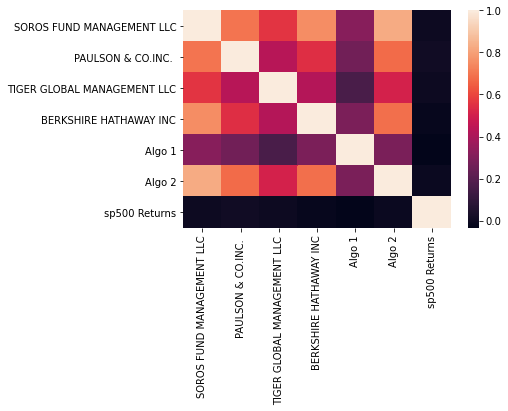

In [47]:
sns.heatmap(joined_data_df.corr())

In [48]:
# Covariance of portfolio
tiger_covar= joined_data_df['TIGER GLOBAL MANAGEMENT LLC'].cov(joined_data_df['sp500 Returns'])
paulson_covar= joined_data_df['PAULSON & CO.INC. '].cov(joined_data_df['sp500 Returns'])
soros_covar= joined_data_df['SOROS FUND MANAGEMENT LLC'].cov(joined_data_df['sp500 Returns'])
berkshire_covar= joined_data_df['BERKSHIRE HATHAWAY INC'].cov(joined_data_df['sp500 Returns'])
algo1_covar= joined_data_df['Algo 1'].cov(joined_data_df['sp500 Returns'])
algo2_covar = joined_data_df['Algo 2'].cov(joined_data_df['sp500 Returns'])

In [49]:
tiger_covar

-1.408113127181807e-07

In [50]:
# calculating the variance of sp500 data
joined_data_df['sp500 Returns'].var()

7.373467552840441e-05

In [51]:
sor_beta = soros_covar / joined_data_df['sp500 Returns'].var()
tiger_beta = tiger_covar/ joined_data_df['sp500 Returns'].var()
paulson_beta = paulson_covar/ joined_data_df['sp500 Returns'].var()
algo1_beta = algo1_covar/ joined_data_df['sp500 Returns'].var()
algo2_beta = algo2_covar/ joined_data_df['sp500 Returns'].var()
berkshire_beta = berkshire_covar/ joined_data_df['sp500 Returns'].var()

In [52]:
sor_beta

0.0005275302230855248

In [53]:
berkshire_beta

-0.020846489408902644

In [54]:
joined_beta_data = [sor_beta, berkshire_beta, algo1_beta, algo2_beta, paulson_beta, tiger_beta]

In [55]:
joined_beta_data

[0.0005275302230855248,
 -0.020846489408902644,
 -0.030149214542337766,
 -0.002129237736587281,
 0.011085230859278487,
 -0.0019097027512372617]

In [56]:
#Calulating sharpe ratios and plot the data findings
joined_sharpe= (joined_data_df.mean())/ joined_data_df.std()* np.sqrt(252)

In [57]:
joined_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500 Returns                 -0.518582
dtype: float64

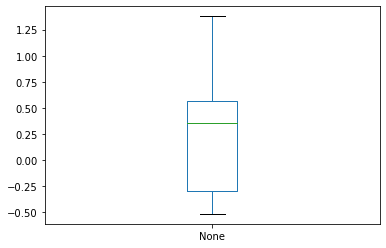

In [58]:
joined_sharpe.plot(kind='box')

In [59]:
csvpath3 = Path('C:\\Users\\willu\Documents\\Resourses2\\week4\\goog_historical.csv')
csvpath4 = Path('C:\\Users\willu\\Documents\\Resourses2\\week4\\cost_historical.csv')
csvpath5 = Path('C:\\Users\\willu\\Documents\\Resourses2\\week4\\aapl_historical.csv')

In [60]:
goog_hist_df = pd.read_csv(csvpath3,index_col='Trade DATE',parse_dates=True,infer_datetime_format=True)
cost_hist_df = pd.read_csv(csvpath4,index_col='Trade DATE',parse_dates=True,infer_datetime_format=True)
aapl_hist_df = pd.read_csv(csvpath5,index_col='Trade DATE',parse_dates=True,infer_datetime_format=True)

In [61]:
goog_hist_df
goog_hist_df = goog_hist_df.rename(columns= {'Symbol':'Symbol','NOCP':'GOOG NOCP'})

In [62]:
aapl_hist_df
aapl_hist_df = aapl_hist_df.rename(columns= {'Symbol':'Symbol','NOCP':'AAPL NOCP'})

In [63]:
cost_hist_df
cost_hist_df = cost_hist_df.rename(columns= {'Symbol':'Symbol','NOCP':'COST NOCP'})

In [64]:
goog_hist_df['GOOG NOCP']= goog_hist_df['GOOG NOCP'].astype('float')

In [65]:
aapl_hist_df['AAPL NOCP']= aapl_hist_df['AAPL NOCP'].astype('float')
cost_hist_df['COST NOCP']= cost_hist_df['COST NOCP'].astype('float')

In [66]:
goog_hist_df.dtypes

Symbol        object
GOOG NOCP    float64
dtype: object

In [67]:
joint_df = pd.concat([goog_hist_df,aapl_hist_df,cost_hist_df], axis='columns',join='inner')

In [68]:
joint_df

,Symbol,GOOG NOCP,Symbol,AAPL NOCP,Symbol,COST NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [69]:
joint_df = joint_df.drop('Symbol',1) 

In [70]:
joint_df.count()

GOOG NOCP    250
AAPL NOCP    250
COST NOCP    250
dtype: int64

In [71]:
joint_df.dtypes

GOOG NOCP    float64
AAPL NOCP    float64
COST NOCP    float64
dtype: object

In [72]:
joint_df

,GOOG NOCP,AAPL NOCP,COST NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [73]:
joint_daily_returns = joint_df.pct_change()

In [74]:
joint_daily_returns

,GOOG NOCP,AAPL NOCP,COST NOCP
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
...,...,...,...
2018-05-17,0.011469,0.003650,0.003217
2018-05-16,0.002948,0.006364,-0.004459
2018-05-15,-0.002348,-0.009246,-0.016255


In [82]:
joint_daily_returns = joint_daily_returns.dropna()

In [83]:
#display data as plot
joint_daily_returns.head()

,GOOG NOCP,AAPL NOCP,COST NOCP
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


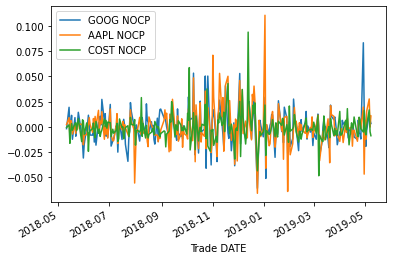

In [86]:
joint_daily_returns.plot()

In [87]:
#CAlculate the weigthed returns of portfolio assuming that the weights are equal

weights = [1/3, 1/3, 1/3]

weigthed_returns = joint_daily_returns.dot(weights)

In [89]:
weigthed_returns

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

In [90]:
#create new jointed dataframe
new_jointed_df = pd.concat([joined_data_df,joint_daily_returns], axis='columns', join='inner')

In [91]:
new_jointed_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns,GOOG NOCP,AAPL NOCP,COST NOCP
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.001763,0.002339,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.019431,0.009172,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.002348,-0.009246,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002948,0.006364,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.011469,0.003650,0.003217
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.007449,-0.019101,-0.000896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000024,-0.003581,-0.001017
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.009985,-0.003276,0.009818
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,-0.012423,-0.014218,-0.008796


In [92]:
new_jointed_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns,GOOG NOCP,AAPL NOCP,COST NOCP
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.001763,0.002339,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.019431,0.009172,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.002348,-0.009246,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002948,0.006364,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.011469,0.003650,0.003217
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.004914,-0.000100,0.004035
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.007449,-0.019101,-0.000896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000024,-0.003581,-0.001017
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.009985,-0.003276,0.009818


In [93]:
#annualized standard deviation of each company
new_jointed_df.std()* np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
sp500 Returns                  0.152147
GOOG NOCP                      0.254936
AAPL NOCP                      0.300245
COST NOCP                      0.215913
dtype: float64

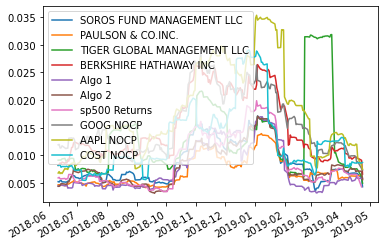

In [98]:
new_jointed21_df = new_jointed_df.rolling(window=21).std().plot()

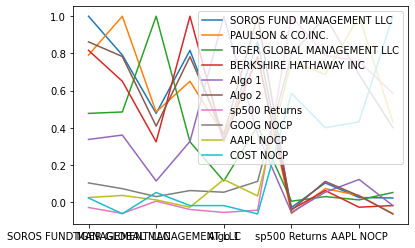

In [101]:
new_jointed_df.corr().plot()

In [102]:
#calulating and plotting beta data for new joint dataframe for 60 day period

new_jointed_beta_df = new_jointed_df/new_jointed_df['sp500 Returns'].var()

In [107]:
new_jointed_beta_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns,GOOG NOCP,AAPL NOCP,COST NOCP
2018-05-11,-51.346603,10.690981,28.570776,-44.901050,3.892617,3.062604,-9.609704,-19.195808,25.458028,-6.669104
2018-05-14,0.000000,0.000000,0.000000,0.000000,9.959320,17.797238,74.998328,211.524527,99.846611,22.275834
2018-05-15,-7.902240,-15.336752,-34.721393,-159.002948,-12.353269,-12.397363,-44.025280,-25.560838,-100.658881,-176.953481
2018-05-16,94.026828,67.977565,59.651224,46.918997,-25.326291,36.368761,9.324865,32.095714,69.279523,-48.540672
2018-05-17,-21.287854,27.475530,-68.225369,-55.952568,-75.651016,56.661295,28.730577,124.852983,39.732790,35.017933
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,29.386138,4.225583,-9.045926,9.108478,-75.601372,31.563716,24.809179,-81.095736,-207.938051,-9.753071
2019-04-17,-31.534489,-70.402869,-48.002542,35.077046,-112.139042,-56.914752,-17.162920,-0.264149,-38.982272,-11.071763
2019-04-18,15.762290,13.300885,6.330854,20.858743,-6.400175,-13.381222,-11.006107,-108.701607,-35.661048,106.885294
2019-04-22,-28.148711,-79.824707,-39.628115,-11.841687,7.365196,-21.072493,-95.403795,-135.243528,-154.782583,-95.749622


In [104]:
new_joint_sharpe= (new_jointed_df.mean())/ new_jointed_df.std()* np.sqrt(252)

In [105]:
new_joint_sharpe

SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
sp500 Returns                 -0.432942
GOOG NOCP                     -0.430354
AAPL NOCP                     -0.183161
COST NOCP                     -1.052624
dtype: float64

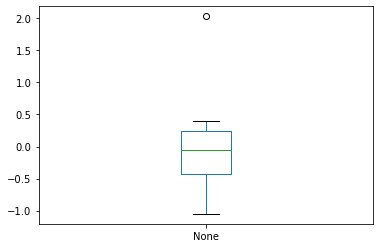

In [106]:
new_joint_sharpe.plot(kind='box')